In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score


In [2]:
data, meta = arff.loadarff('data_1600_accel_watch.arff')
data
df = pd.DataFrame(data)
df

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,b'A',0.000,0.000,0.000,0.045,0.090,0.190,0.215,0.210,0.135,...,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,b'1600'
1,b'A',0.000,0.000,0.000,0.000,0.030,0.250,0.305,0.225,0.125,...,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,b'1600'
2,b'A',0.000,0.000,0.000,0.000,0.015,0.280,0.300,0.210,0.140,...,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,b'1600'
3,b'A',0.000,0.000,0.000,0.005,0.070,0.245,0.275,0.220,0.130,...,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,b'1600'
4,b'A',0.000,0.000,0.000,0.000,0.015,0.260,0.325,0.230,0.110,...,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,b'1600'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,b'S',0.730,0.070,0.090,0.030,0.040,0.030,0.005,0.005,0.000,...,0.572075,0.564724,0.432426,-0.323714,0.149581,-0.232945,-0.370435,0.366658,10.2891,b'1600'
323,b'S',0.660,0.080,0.080,0.055,0.085,0.030,0.010,0.000,0.000,...,0.536467,0.529573,0.386579,-0.452506,0.137247,-0.107110,-0.514242,0.314914,10.2826,b'1600'
324,b'S',0.920,0.065,0.010,0.000,0.000,0.005,0.000,0.000,0.000,...,0.564000,0.556752,0.701466,-0.488788,-0.209296,-0.010531,0.039774,0.418878,10.1310,b'1600'
325,b'S',0.665,0.055,0.075,0.100,0.090,0.010,0.005,0.000,0.000,...,0.498486,0.492080,0.425515,-0.288078,0.290897,-0.247808,-0.569842,0.003633,10.1086,b'1600'


Moving and Static
Moving: Walking: A, Jogging: B, stairs: C, standing: E, kicking(Soccer Ball): M,
Playing Catch w/Tennis Ball: O, Dribbling(Basketball): P

In [3]:
A = df.loc[df['"ACTIVITY"']== b'A']
# A

In [4]:
B = df.loc[df['"ACTIVITY"']== b'B']
# B

In [5]:
frames = [A, B]
user_1 = pd.concat(frames)
user_1 = user_1.reindex(index=[0,1,2,3,4,5,18,19,20,21,22,23,6,7,8,9,10,11,24,25,26,27,28,29,12,13,14,15,16,17,30,31,32,33,34,35,])
user_1

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,b'A',0.000,0.000,0.000,0.045,0.090,0.190,0.215,0.210,0.135,...,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,b'1600'
1,b'A',0.000,0.000,0.000,0.000,0.030,0.250,0.305,0.225,0.125,...,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,b'1600'
2,b'A',0.000,0.000,0.000,0.000,0.015,0.280,0.300,0.210,0.140,...,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,b'1600'
3,b'A',0.000,0.000,0.000,0.005,0.070,0.245,0.275,0.220,0.130,...,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,b'1600'
4,b'A',0.000,0.000,0.000,0.000,0.015,0.260,0.325,0.230,0.110,...,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,b'1600'
5,b'A',0.000,0.000,0.000,0.020,0.110,0.295,0.220,0.155,0.145,...,0.513645,0.507045,-0.515503,0.254423,-0.287578,-0.091598,-0.164082,-0.152699,12.1479,b'1600'
18,b'B',0.360,0.075,0.140,0.185,0.160,0.065,0.010,0.000,0.005,...,0.618168,0.610225,-0.102269,0.047395,0.336981,-0.050624,0.051660,0.433173,11.6394,b'1600'
19,b'B',0.365,0.105,0.140,0.165,0.175,0.035,0.010,0.000,0.000,...,0.556712,0.549558,0.010148,0.150129,0.350951,0.047837,0.156188,0.366111,12.3725,b'1600'
20,b'B',0.425,0.075,0.185,0.135,0.110,0.055,0.015,0.000,0.000,...,0.498795,0.492386,0.149822,0.213754,-0.004434,0.100381,0.234209,0.159224,12.1532,b'1600'
21,b'B',0.355,0.085,0.105,0.150,0.155,0.105,0.035,0.010,0.000,...,0.587675,0.580124,-0.111992,0.025842,0.340143,-0.038625,0.061175,0.207231,13.2011,b'1600'


In [6]:
def knn_classifier(X_train, Y_train, X_test, n_neighbors):
    classifier =  KNeighborsClassifier(n_neighbors = n_neighbors)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    return Y_pred


In [7]:
Y = user_1.iloc[:,0].values
X = user_1.iloc[:, 1:92].values
Y

array([b'A', b'A', b'A', b'A', b'A', b'A', b'B', b'B', b'B', b'B', b'B',
       b'B', b'A', b'A', b'A', b'A', b'A', b'A', b'B', b'B', b'B', b'B',
       b'B', b'B', b'A', b'A', b'A', b'A', b'A', b'A', b'B', b'B', b'B',
       b'B', b'B', b'B'], dtype=object)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
Y_train

array([b'A', b'A', b'A', b'A', b'A', b'A', b'B', b'B', b'B', b'B', b'B',
       b'B', b'A', b'A', b'A', b'A', b'A', b'A', b'B', b'B', b'B', b'B',
       b'B', b'B', b'A', b'A', b'A', b'A'], dtype=object)

In [9]:
Y_train = np.where(Y_train==b'A', 1, Y_train)
Y_train = np.where(Y_train==b'B', 0, Y_train).astype(int)
Y_train.dtype
Y_train.reshape(-1,1)
Y_test = np.where(Y_test==b'A', 1, Y_test)
Y_test = np.where(Y_test==b'B', 0, Y_test).astype(int)
Y_test.reshape(-1,1)
# Y_test

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [123]:
window_size_initial = 6 # window size
n = (len(X_train)//6 + 1)*6 +1
X_history = [] # input_train_history
Y_history = [] # input_target_history
f1 = []
# print('first_window_size', window_size)
print("Y_train", Y_train)
print("Y_test", Y_test)
for window_size in range (6,n,window_size_initial):

    X_train_stream = X_train[window_size-6:window_size,:]
    Y_train_stream = Y_train[window_size-6:window_size]

    print( "Y_train_stream", Y_train_stream)

    # print('window_size', window_size)
    # print(X_train_stream[0])
    # print(Y_train_stream)
    for i in range (len(X_train_stream)):
        print("Epoch: ",window_size//6,"-",i)
        if len(X_history) == 0:
            X_history.append(X_train_stream[i])
        else:
            X_history = np.vstack((X_history,X_train_stream[i]))
        # print(X_history)

        Y_history.append(Y_train_stream[i])
        print("Y_history",Y_history)


        if len(X_history) < 5:
            n_neighbors = 1
        else:
            n_neighbors = 5
        Y_pred = knn_classifier(X_history, Y_history, X_test, n_neighbors=n_neighbors)
        print("Y_pred",Y_pred)
        print("f1_score = ",f1_score(Y_test, Y_pred, average='weighted'))
        f1.append(f1_score(Y_test, Y_pred, average='weighted'))
        print("------------------------------------------------------------------------")
else:
    print("finished")

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))

Y_train [1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
Y_test [1 1 0 0 0 0 0 0]
Y_train_stream [1 1 1 1 1 1]
Epoch:  1 - 0
Y_history [1]
Y_pred [1 1 1 1 1 1 1 1]
f1_score =  0.1
------------------------------------------------------------------------
Epoch:  1 - 1
Y_history [1, 1]
Y_pred [1 1 1 1 1 1 1 1]
f1_score =  0.1
------------------------------------------------------------------------
Epoch:  1 - 2
Y_history [1, 1, 1]
Y_pred [1 1 1 1 1 1 1 1]
f1_score =  0.1
------------------------------------------------------------------------
Epoch:  1 - 3
Y_history [1, 1, 1, 1]
Y_pred [1 1 1 1 1 1 1 1]
f1_score =  0.1
------------------------------------------------------------------------
Epoch:  1 - 4
Y_history [1, 1, 1, 1, 1]
Y_pred [1 1 1 1 1 1 1 1]
f1_score =  0.1
------------------------------------------------------------------------
Epoch:  1 - 5
Y_history [1, 1, 1, 1, 1, 1]
Y_pred [1 1 1 1 1 1 1 1]
f1_score =  0.1
--------------------------------------------------------

In [10]:
# f1 = []
# window_size = 6
# for i in range (6, 29, window_size):
#     X_train_stream = X_train[0:i,:]
#     Y_train_stream = Y_train[0:i]
#     print(Y_train_stream)
#     Y_pred = knn_classifier(X_train_stream, Y_train_stream, X_test, n_neighbors=5)
#     print(f1_score(Y_test, Y_pred, average='weighted'))
#     f1.append(f1_score(Y_test, Y_pred, average='weighted'))
#     print(Y_pred)

[1 1 1 1 1 1]
0.1
[1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 0 0 0 0 0 0]
1.0
[1 1 0 0 0 0 0 0]
[1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1]
1.0
[1 1 0 0 0 0 0 0]
[1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
1.0
[1 1 0 0 0 0 0 0]


Text(0, 0.5, 'f1 score')

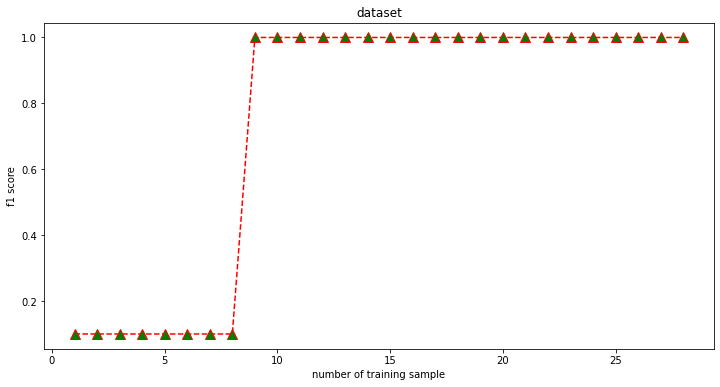

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29, 1), f1, color='red', linestyle='dashed', marker='^',
         markerfacecolor='green', markersize=10)
plt.title('dataset')
plt.xlabel('number of training sample')
plt.ylabel('f1 score')